In [1]:
import keras
from keras.models import Sequential, Model,load_model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
from keras.metrics import PrecisionAtRecall,Recall 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from numpy.random import seed
import tensorflow
from keras.layers import Input, concatenate
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
path = "C:/Users/riasi/Desktop/dataset/COVID-19_Radiography_Dataset"

classes=["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]
num_classes = len(classes)
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, 
                                  validation_split=0.2)

train_gen = train_datagen.flow_from_directory(directory=path, 
                                              target_size=(32,32),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="rgb")

test_gen = test_datagen.flow_from_directory(directory=path, 
                                              target_size=(32,32),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=False, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="rgb")

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.


In [11]:
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=96, input_shape=(32,32, 3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization()),
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
AlexNet.add(Flatten())
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(4))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)        

In [12]:
AlexNet.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['Accuracy'])

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=0, factor=0.5, min_lr=0.00001)
early_stopping_monitor = EarlyStopping(patience=100,monitor='val_loss', mode = 'min',verbose=0)
callbacks_list = [learning_rate_reduction,early_stopping_monitor]

In [7]:
AlexNet.fit(train_gen, validation_data = test_gen, epochs = 80, batch_size = 128, callbacks = [callbacks_list])

Epoch 1/80
1059/1059 [==============================] - 296s 277ms/step - loss: 1.0153 - Accuracy: 0.6028 - val_loss: 1.4621 - val_Accuracy: 0.4423
Epoch 2/80
1059/1059 [==============================] - 291s 274ms/step - loss: 0.8636 - Accuracy: 0.6549 - val_loss: 1.5146 - val_Accuracy: 0.3601
Epoch 3/80
1059/1059 [==============================] - 288s 272ms/step - loss: 0.8085 - Accuracy: 0.6711 - val_loss: 1.1296 - val_Accuracy: 0.5839
Epoch 4/80
1059/1059 [==============================] - 289s 273ms/step - loss: 0.7757 - Accuracy: 0.6864 - val_loss: 1.0581 - val_Accuracy: 0.5610
Epoch 5/80
1059/1059 [==============================] - 287s 271ms/step - loss: 0.7435 - Accuracy: 0.7029 - val_loss: 1.2221 - val_Accuracy: 0.5213
Epoch 6/80
1059/1059 [==============================] - 294s 278ms/step - loss: 0.7160 - Accuracy: 0.7188 - val_loss: 1.1391 - val_Accuracy: 0.5884
Epoch 7/80
1059/1059 [==============================] - 294s 278ms/step - loss: 0.6934 - Accuracy: 0.7294 - val_

In [8]:
AlexNet.save('AlexNet.h5')

In [14]:
AlexNet = keras.models.load_model('AlexNet.h5')

In [15]:
y_pred = AlexNet.predict(test_gen)

In [16]:
y_true=test_gen.classes
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))
class_report = classification_report(y_true, predictions, target_names = ['Covid-19', 'Lung Opacity', 'Healthy', 'Pneumonia'])

In [17]:
print(class_report)

              precision    recall  f1-score   support

    Covid-19       0.73      0.85      0.78       723
Lung Opacity       0.82      0.86      0.84      1202
     Healthy       0.91      0.84      0.87      2038
   Pneumonia       0.91      0.87      0.89       269

    accuracy                           0.85      4232
   macro avg       0.84      0.85      0.85      4232
weighted avg       0.85      0.85      0.85      4232



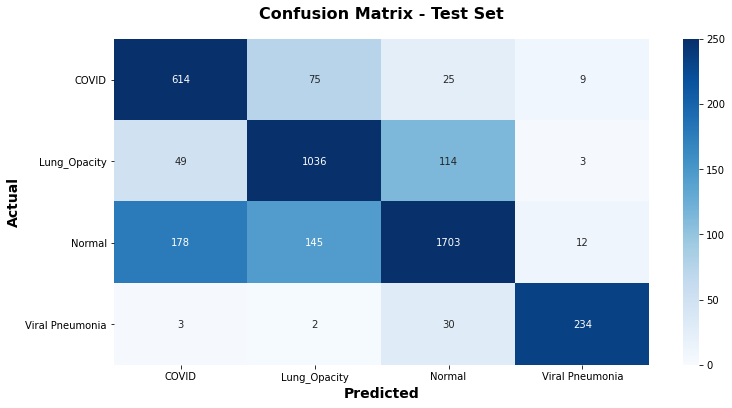

In [18]:
CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)
plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);